https://github.com/santosjorge/cufflinks

http://nbviewer.jupyter.org/gist/santosjorge/aba934a0d20023a136c2

  **Table of Contents**

  <div id="toc"></div>
  <script type="text/javascript"
  src="https://raw.github.com/kmahelona/ipython_notebook_goodies/master/ipython_notebook_toc.js">
  </script>



In [1]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
from plotly.tools import FigureFactory as FF

In [2]:
import pandas as pd
import cufflinks as cf
import numpy as np
from IPython.display import display,HTML

# Themes

In [32]:
help(cf.set_config_file)

Help on function set_config_file in module cufflinks.auth:

set_config_file(sharing=None, theme=None, colorscale=None, offline=None, offline_url=None, offline_show_link=None, offline_link_text=None, datagen_mode=None, **kwargs)
    Set the keyword-value pairs in `~/.config`.
    
    sharing : string
                    Sets the sharing level permission
                            public - anyone can see this chart
                            private - only you can see this chart
                            secret - only people with the link can see the chart
    theme : string
                    Sets the default theme
                    See cufflinks.getThemes() for available themes 
    colorscale : string
                    Sets the default colorscale
                    See cufflinks.scales()
    offline : bool
                    If true then the charts are rendered
                    locally. 
    offline_show_link : bool
                    If true then the chart will show a

In [44]:
cf.set_config_file(theme='ggplot',sharing='secret',offline=True,offline_show_link=False)
cf.datagen.lines(1,1000).iplot(filename='tmp')

# Basic line plots (time series)
The `iplot` method on Series and DataFrame is wrapper of Plotly's plot method

In [7]:
# Cufflinks can generate random data for different shapes
# Let's generate a single line with 1000 points
df = cf.datagen.lines(1,1000)

print type(df)
df.head(n=5)

<class 'pandas.core.frame.DataFrame'>


,LBX.PM
2015-01-01,1.1726
2015-01-02,2.4755
2015-01-03,1.9252
2015-01-04,2.0679
2015-01-05,2.6334


In [27]:
(df+1).iplot()

In [8]:
# Generating 4 timeseries 
df=cf.datagen.lines(4,1000)

df.head(n=5)

,KQS.LM,KLW.IG,LLV.TH,DOM.YU
2015-01-01,0.3815,-0.4612,0.7525,-0.5522
2015-01-02,0.3395,-0.6732,1.3822,-0.6806
2015-01-03,-0.4618,0.2621,-0.3833,-0.7100
2015-01-04,-0.5925,2.3275,0.0263,-1.2653
2015-01-05,-1.8806,3.3377,0.6171,-3.3007


In [9]:
cf.getThemes()

['polar', 'space', 'ggplot', 'pearl', 'solar', 'white', 'henanigans']

In [10]:
df.iplot(dimensions=(1200,800))



You can plot one column versus another using the x and y keywords in iplot


In [11]:
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()
df3['A'] = pd.Series(list(range(len(df3))))
df3.iplot(x='A', y='B')

# Bar Plots
```python
df.iplot(kind='bar')
```

In [12]:
df.ix[3].iplot(kind='bar',bargap=.5)

## Multiple bars

In [14]:
df=pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.iplot(kind='bar')

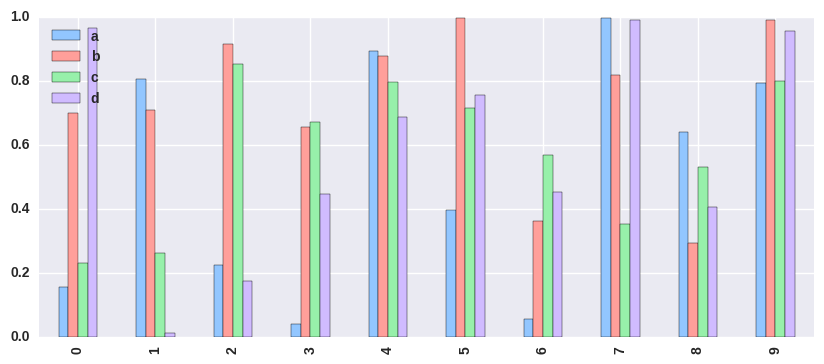

In [15]:
# comparison with pandas plot
import matplotlib.pyplot as plt
df.plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(10,4)

## Stacked bars

In [16]:
df.iplot(kind='bar',barmode='stack')

## Horizontal bars (kind='barh')

In [17]:
df.iplot(kind='barh',barmode='stack',bargap=.1)

# Histograms

In [18]:
df = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
                    'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])
df.iplot(kind='histogram')

In [19]:
df.iplot(kind='histogram',barmode='stack',bins=20)

## Normalized over probability


In [20]:
df.iplot(kind='histogram',columns=['a'],orientation='h',histnorm='probability')

## Subplots

In [21]:
df_h=cf.datagen.histogram(4)
df_h.iplot(kind='histogram',subplots=True,bins=50,histnorm='probability')

# Boxplots

In [22]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.iplot(kind='box')


## Grouping values

Grouping values by generating a list of figures



In [23]:
df = pd.DataFrame(np.random.rand(10,2), columns=['Col1', 'Col2'] )
df['X'] = pd.Series(['A','A','A','A','A','B','B','B','B','B'])

In [24]:
figs=[df[df['X']==d][['Col1','Col2']].iplot(kind='box',asFigure=True) for d in pd.unique(df['X']) ]

In [25]:
cf.iplot(cf.subplots(figs))

Grouping values and ammending the keys

In [26]:
def by(df,category):
    l=[]
    for cat in pd.unique(df[category]):
        _df=df[df[category]==cat]
        del _df[category]
        _df=_df.rename(columns=dict([(k,'{0}_{1}'.format(cat,k)) for k in _df.columns]))
        l.append(_df.iplot(kind='box',asFigure=True))
    return l


In [27]:
cf.iplot(cf.subplots(by(df,'X')))

# Area Plots


In [28]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.iplot(kind='area',fill=True,opacity=1)

In [30]:
df.iplot(fill=True) # default opacity = 0.3

# Scatter plots

In [31]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
df.iplot(kind='scatter',x='a',y='b',mode='markers')

## Assign color via dict or list
Below, the y-axis is the magnitude for each column

In [32]:
#df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
df.iplot(kind='scatter',mode='markers',symbol='dot',colors=['orange','teal','blue','yellow'],size=10)

## Use size to set bubble size
```python
size='c'
```

In [33]:
#df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
df.iplot(kind='bubble',x='a',y='b',size='c')

# Scattermatrix

In [44]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])
df.scatter_matrix()

In [43]:
cf.get_config_file()

{u'colorscale': u'dflt',
 u'datagen_mode': u'stocks',
 u'dimensions': None,
 u'offline': True,
 u'offline_link_text': True,
 u'offline_show_link': True,
 u'offline_url': u'',
 u'sharing': u'secret',
 u'theme': u'ggplot'}

# Subplots
```python
df.iplot(subplots=True,shape=(4,1),shared_xaxes=True,vertical_spacing=.02,fill=True)
```

In [45]:
df=cf.datagen.lines(4)

In [46]:
df.iplot(subplots=True,shape=(4,1),shared_xaxes=True,vertical_spacing=.02,fill=True)

In [47]:
df.iplot(subplots=True,subplot_titles=True,legend=False)

In [48]:
df=cf.datagen.bubble(10,50,mode='stocks')

## irregular shaped subplots

In [49]:
figs=cf.figures(df,[dict(kind='histogram',keys='x',color='blue'),
                    dict(kind='scatter',mode='markers',x='x',y='y',size=5),
                    dict(kind='scatter',mode='markers',x='x',y='y',size=5,color='teal')],asList=True)
figs.append(cf.datagen.lines(1).figure(bestfit=True,colors=['blue'],bestfit_colors=['pink']))
base_layout=cf.tools.get_base_layout(figs)
sp=cf.subplots(figs,shape=(3,2),base_layout=base_layout,vertical_spacing=.15,horizontal_spacing=.03,
               specs=[[{'rowspan':2},{}],[None,{}],[{'colspan':2},None]],
               subplot_titles=['Histogram','Scatter 1','Scatter 2','Bestfit Line'])
sp['layout'].update(showlegend=False)

/home/takanori/.local/lib/python2.7/site-packages/cufflinks/plotlytools.py:164: FutureWarning:

The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html



In [50]:
cf.iplot(sp)

# Shapes


In [51]:
df=cf.datagen.lines(3,columns=['a','b','c'])
df.iplot(hline=[2,4],vline=['2015-02-10'])

More advanced parameters can be passed in the form of a dictionary, including width and color and dash for the line dash type.

In [52]:
df.iplot(hline=[dict(y=-1,color='blue',width=3),dict(y=1,color='pink',dash='dash')])



Shaded areas can be plotted using hspan and vspan for horizontal and vertical areas respectively.
These can be set with a list of paired tuples (v0,v1) or a list of dictionaries with further parameters.


In [53]:
df.iplot(hspan=[(-1,1),(2,5)])



Extra parameters can be passed in the form of dictionaries, width, fill, color, fillcolor, opacity


In [54]:
df.iplot(vspan={'x0':'2015-02-15','x1':'2015-03-15','color':'teal','fill':True,'opacity':.4})

In [55]:
# Plotting resistance lines
max_vals=df.max().values.tolist()
resistance=[dict(kind='line',y=i,color=j,width=2) for i,j in zip(max_vals,['red','blue','pink'])]
df.iplot(hline=resistance)

Different shapes can also be used with shapes and identifying the kind which can be either line, rect or circle

In [56]:
# Get min to max values

df_a=df['a']
max_val=df_a.max()
min_val=df_a.min()
max_date=df_a[df_a==max_val].index[0].strftime('%Y-%m-%d')
min_date=df_a[df_a==min_val].index[0].strftime('%Y-%m-%d')
shape1=dict(kind='line',x0=max_date,y0=max_val,x1=min_date,y1=min_val,color='blue',width=2)
shape2=dict(kind='rect',x0=max_date,x1=min_date,fill=True,color='gray',opacity=.3)

df_a.iplot(shapes=[shape1,shape2])

## Other shapes

In [58]:
x0 = np.random.normal(2, 0.45, 300)
y0 = np.random.normal(2, 0.45, 300)

x1 = np.random.normal(6, 0.4, 200)
y1 = np.random.normal(6, 0.4, 200)

x2 = np.random.normal(4, 0.3, 200)
y2 = np.random.normal(4, 0.3, 200)

distributions = [(x0,y0),(x1,y1),(x2,y2)]

dfs=[pd.DataFrame(dict(x=i,y=j)) for i,j in distributions]

In [59]:
d=cf.Data()
gen=cf.colorgen(scale='ggplot')
for df in dfs:
    d_=df.figure(kind='scatter',mode='markers',x='x',y='y',size=5,colors=gen.next())['data']
    for _ in d_:
        d.append(_)

In [60]:
gen=cf.colorgen(scale='ggplot')
shapes=[cf.tools.get_shape(kind='circle',x0=min(x),x1=max(x),
         y0=min(y),y1=max(y),color=gen.next(),fill=True,
         opacity=.3,width=.4) for x,y in distributions]

In [61]:
fig=cf.Figure(data=d)
fig['layout']=cf.getLayout(shapes=shapes,legend=False,title='Distribution Comparison')
cf.iplot(fig,validate=False)